# <font color="darkblue"> Prática 01: Classificação Linear - Regressão Logística </font>

**Objetivos:**


*   Implementar o modelo linear de *Regressão Logística*
*   Comparar seu resultado de classificiação linear com o LRClassifier

**Requisitos de execução:**


*   Upload dos arquivos *random_input.py*, *linearregression.py* e *lrclassifier.py*

**Atividade 1:**

1. Gere $N=100$ pontos aleatórios com rótulos de classificação utilizando a classe RandomInput da Aula 14;

    

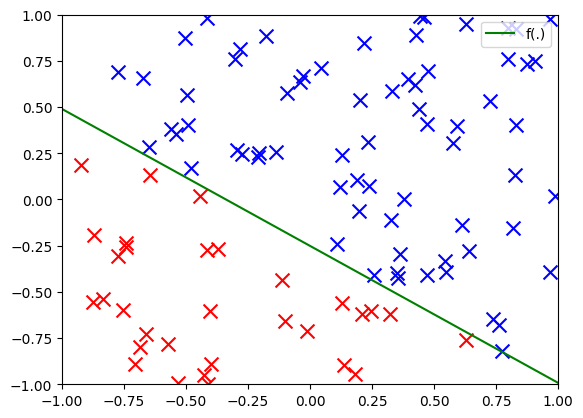

In [1]:
from random_input import RandomInput, draw
    
N = 100
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
    
draw(_X, _y, rIN)

**Atividade 2:**

Implemente a *Regressão Logística* com o algoritmo *Gradiente Descendente*:

1. $w(0)=0$; $\eta = 0.1$;
2. **Para** $t=0,1,2..,tmax$ **faça**
3. $\quad\quad g_t=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^T(t)x_n}}$;
4. $\quad\quad$ **Se** $(\lVert g_t \rVert < \epsilon)$ : **break**;
5. $\quad\quad w(t+1) = w(t) - \eta g_t$;
6. Retorne $w$


In [27]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, batch_size=32):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        
        X = np.concatenate((np.ones((len(_X),1)), _X), axis=1)
        y = np.array(_y)
        
        d = X.shape[1]
        N = X.shape[0]

        w = np.zeros(d, dtype=float)
        self.w = []

        for i in range(self.tmax):
            vg = np.zeros(d, dtype=float)

            if self.batch_size < N:
                indexes = random.sample(range(N), self.batch_size)
                batch_x = [X[j] for j in indexes]
                batch_y = [y[j] for j in indexes]
            else:
                batch_x = X
                batch_y = y
            
            for x_, y_ in zip(batch_x, batch_y):
                vg += (y_ * x_) / (1 + np.exp((y_ * w).T @ x_))

            gm = vg / self.batch_size

            if LA.norm(gm) < 0.0001:
                break

            w += self.eta * gm

        self.w = w
        

    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        return [(1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) for x in X]

    #Predicao por classificação linear
    def predict(self, X):
        return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5 
                else -1 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]
    

**Atividade 3:** 

1. Utilize o algoritmo de *Regressão Logística* para computar a função hipótese $g(x)=\theta(w^Tx)$ inferida sobre os pontos aleatórios gerados;
2. Plote, em um gráfico de dispersão, a probabilidade inferida pelo algoritmo em cada ponto;
3. Utilize a *Regressão Logística* como classificador linear e plote os pontos classificados com bolinha azul(1) e vermelha(0);
4. Compute o erro dentro da amostra gerado pela classificação linear do algoritmo de *Regressão Logistica*.


[np.float64(0.02640054930771938), np.float64(0.9919153777596258), np.float64(0.9997353755537587), np.float64(0.8986637822580258), np.float64(0.9940876568989985), np.float64(0.013641301196502188), np.float64(0.9944416386931179), np.float64(0.9995981597405317), np.float64(0.9014114269555761), np.float64(0.9182190574333149), np.float64(0.9844701482920043), np.float64(0.025756850174354702), np.float64(0.6376178036199884), np.float64(0.6169000946699934), np.float64(0.9976440097019322), np.float64(0.9964869053276021), np.float64(0.5317824576557423), np.float64(0.7897075128265408), np.float64(0.9993771733423346), np.float64(0.1598461580452349), np.float64(0.3259973469079565), np.float64(0.8049469335714415), np.float64(0.9946538888360912), np.float64(0.36888858018448806), np.float64(0.8960898193613281), np.float64(0.9790381080681299), np.float64(0.9973911904195829), np.float64(0.8775688828322414), np.float64(0.9966329093563989), np.float64(0.6611076076745633), np.float64(0.9719112018527285), n

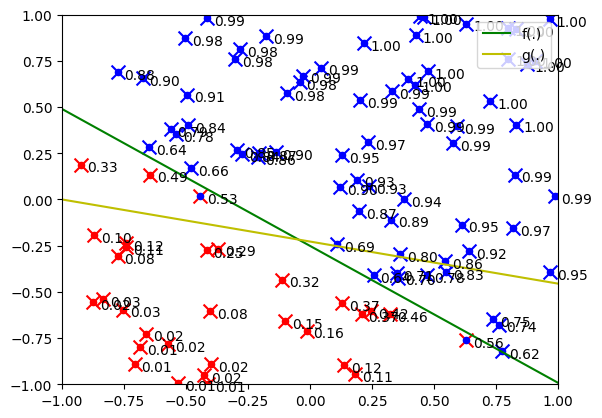

In [28]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")


**Atividade 4:**

1. Reproduza o mesmo experimento para o classificador linear com Regressão Linear (*RCClassifier*);
2. Implemente o algoritmo *Gradiente Descendente Estocástico* na classe *LogisticRegression_* e compare os resultados.

Ein = 2.0%


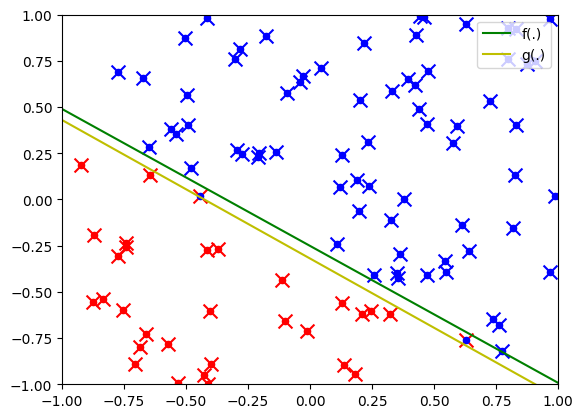

In [29]:
from lrclassifier import LRClassifier

classifier = LRClassifier()
rx = [ [1, x[0], x[1]] for x in _X]
classifier.fit(rx, _y)

draw(_X, _y, rIN)

#desenha a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rx)
xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
eIn = 0
for i in range(N):
  if(pred[i] != _y[i]):
    eIn += 1
eIn /= N
print("Ein = " + str(eIn * 100) + "%")

Atividade 5:

1. Reproduza o mesmo experimento com a classe LogisticRegression do pacote *sklearn.linear_model*
        from sklearn.linear_model import LogisticRegression

Error in : 4.0%


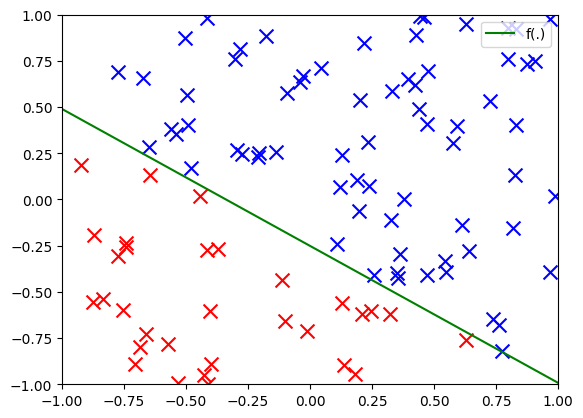

In [30]:
from sklearn.linear_model import LogisticRegression
draw(_X, _y, rIN)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(rx, _y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(rx)
#print(pred)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)
#print(pred)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")